In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
from os import listdir
from os.path import isfile, join

In [61]:
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [36]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC, SVR


In [3]:
import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
#from tensorflow import keras
#from tensorflow.keras import layers
#from tensorflow.keras.preprocessing.image import load_img
#from tensorflow.keras.preprocessing.image import array_to_img
#from tensorflow.keras.preprocessing.image import img_to_array
import os
import cv2

In [4]:
#mypath = "/content/drive/MyDrive/crop_part1"
mypath = "C:/Users/User/Desktop/CUNY/Faces_img/cropped.tar/cropped/crop_part1"


In [5]:
filenames = np.array([f for f in listdir(mypath) if isfile(join(mypath, f))])
splitcolumns = [x.split('_')[0:3] + [x] for x in filenames if x.count('_') == 3]
filecolumns = ['age','gender','race','file']
filedf = pd.DataFrame(data = splitcolumns, columns = filecolumns)
filedfnona = filedf.dropna()
filedfnona['age']  = filedfnona['age'].astype(int)
filedfnona['race'] = filedfnona['race'].astype(int)
filedfnona['gender'] = filedfnona['gender'].astype(int)

In [6]:
filedfnona.head()

,age,gender,race,file
0,100,1,0,100_1_0_20170110183726390.jpg.chip.jpg
1,100,1,2,100_1_2_20170105174847679.jpg.chip.jpg
2,101,1,2,101_1_2_20170105174739309.jpg.chip.jpg
3,10,0,0,10_0_0_20161220222308131.jpg.chip.jpg
4,10,0,0,10_0_0_20170103200329407.jpg.chip.jpg


In [41]:
from tqdm import tqdm
images = []
age = []
gender = []
race = []
for index, row in tqdm(filedfnona.iloc[:2000].iterrows(), total=20000):
    img = np.array(cv2.imread(mypath+'/'+row[3]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).ravel()
    images.append(img)
    age.append([row[0]])
    gender.append([row[1]])
    race.append([row[2]])

 10%|█         | 2000/20000 [00:02<00:18, 980.42it/s] 


In [42]:
age

[[100],
 [100],
 [101],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [10],
 [1

In [24]:
X_img =np.array(images)

In [25]:
X_scaled = X_img/ 255.0

In [26]:
X_scaled.shape

(2000, 40000)

In [44]:
y_age = np.array(age).astype(int).ravel()
y_gender = np.array(gender).astype(int).ravel()
y_race = np.array(race).astype(int)

In [28]:
y_gender

array([1, 1, 1, ..., 1, 1, 1])

In [29]:
#gender
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_gender,y_age test_size=0.33, random_state=42)

In [30]:
X_train.shape[0], X_test.shape[0]

(1340, 660)

In [31]:
model = SVC(kernel = 'linear', C=1.0, random_state=42, verbose = True)

In [32]:
model.fit(X_train, y_train)

[LibSVM]

SVC(kernel='linear', random_state=42, verbose=True)

In [33]:
y_pred_train = model.predict(X_train)

In [34]:
print(f"accuracy: {accuracy_score(y_train, y_pred_train)}")
print(f"{classification_report(y_train, y_pred_train)}")

accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       772
           1       1.00      1.00      1.00       568

    accuracy                           1.00      1340
   macro avg       1.00      1.00      1.00      1340
weighted avg       1.00      1.00      1.00      1340



In [35]:
y_pred_test = model.predict(X_test)
print(f"accuracy: {accuracy_score(y_test, y_pred_test)}")
print(f"{classification_report(y_test, y_pred_test)}")

accuracy: 0.7303030303030303
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       389
           1       0.67      0.68      0.68       271

    accuracy                           0.73       660
   macro avg       0.72      0.72      0.72       660
weighted avg       0.73      0.73      0.73       660



In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_age, test_size=0.33, random_state=42)

In [46]:
X_scaled.shape,y_age.shape

((2000, 40000), (2000,))

In [48]:
model_r = SVR(kernel = 'linear', C=1.0, verbose = True)

In [49]:
model_r.fit(X_train, y_train)

[LibSVM]

SVR(kernel='linear', verbose=True)

In [50]:
y_pred_age = model_r.predict(X_train)

In [53]:
y_age.shape, y_pred_age.shape

((2000,), (1340,))

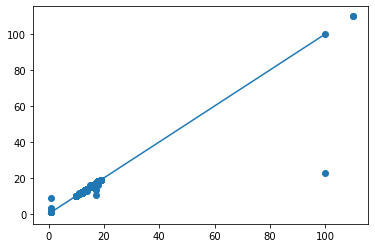

In [58]:
plt.scatter(y_train, y_pred_age)
plt.plot([0,100],[0,100])

In [60]:
mean_squared_error(y_train, y_pred_age)

4.580023674806437

In [62]:
mean_absolute_error(y_train, y_pred_age)

0.17610614698965138

In [64]:
y_test_age = model_r.predict(X_test)

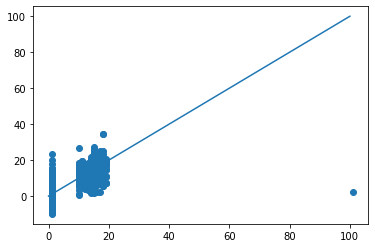

In [65]:
plt.scatter(y_test,y_test_age)
plt.plot([0,100],[0,100])

In [67]:
mean_absolute_error(y_test, y_test_age)

3.99863751885033

In [ ]:
from io import BytesIO

In [11]:
model = keras.applications.VGG16()


553476096/553467096 [==============================] - 3s 0us/step
